<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/agglomerative_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [13]:
x, y=make_blobs(  n_samples=500,centers=[[4,4], [2,2,],[1,5],[4,5], [2,7], [6,2]],cluster_std=0.5)

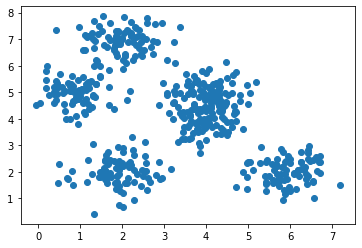

In [14]:
plt.scatter(x[:,0], x[:,1])

In [26]:
alg=AgglomerativeClustering( n_clusters=6,linkage='ward')

In [27]:
alg.fit(x,y)

AgglomerativeClustering(n_clusters=6)

In [20]:
plt.figure(figsize=(6,9))
x_min,x_max=np.min(x, axis=0),np.max(x,axis=0)


<Figure size 432x648 with 0 Axes>

In [28]:
dism=distance_matrix(x,x)
print(dism)

[[0.         3.96516021 2.35144751 ... 3.48042828 2.99754396 1.02048225]
 [3.96516021 0.         3.84388528 ... 1.41950708 1.09884094 3.24594322]
 [2.35144751 3.84388528 0.         ... 2.62710904 2.77190044 2.85692502]
 ...
 [3.48042828 1.41950708 2.62710904 ... 0.         0.83137937 3.10540855]
 [2.99754396 1.09884094 2.77190044 ... 0.83137937 0.         2.44147557]
 [1.02048225 3.24594322 2.85692502 ... 3.10540855 2.44147557 0.        ]]


In [45]:
Z = hierarchy.linkage(dism, 'ward')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


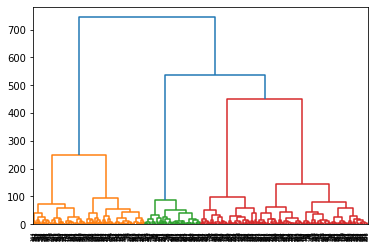

In [46]:
dendro = hierarchy.dendrogram(Z)

In [31]:
!wget -O cars_clus.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv

--2022-10-29 14:16:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2022-10-29 14:16:59 (208 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [32]:
df=pd.read_csv('cars_clus.csv')

In [59]:
df.shape

(157, 16)

In [64]:
df.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [61]:
df.isnull().sum()

manufact     0
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [66]:
df.shape

(157, 16)

In [84]:
df=df.dropna()

In [67]:
df=df.reset_index(drop=True)

In [79]:
col=df [['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']].apply(pd.to_numeric, errors='coerce')

In [83]:
col.shape

(157, 8)

In [86]:
x1=col.values
scale=MinMaxScaler()
trans=scale.fit_transform(x1)
trans[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.2716763 , 0.30625832,
        0.20233886, 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.44508671, 0.5792277 ,
        0.44112048, 0.31797235, 0.33333333],
       [0.31428571, 0.43037975, 0.31019523, 0.46242775, 0.56724368,
        0.42833832, 0.31797235, 0.36666667],
       [0.35714286, 0.39240506, 0.47722343, 0.50867052, 0.62849534,
        0.53168344, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.32369942, 0.38082557,
        0.2999728 , 0.28110599, 0.4       ]])

In [91]:
trans.shape

(157, 8)

In [99]:
from sklearn.metrics.pairwise import euclidean_distances
dis=euclidean_distances( trans[0:5],trans[0:10])
print(dis)

[[0.00000000e+00 5.60613497e-01 5.43684155e-01 7.29571599e-01
  2.05473640e-01 7.47887637e-01 1.02120709e+00 2.99576076e-01
  3.58310143e-01 5.44215830e-01]
 [5.60613497e-01 2.10734243e-08 4.89530720e-02 2.21788592e-01
  4.12444322e-01 3.65671399e-01 4.97191353e-01 3.20857717e-01
  2.84683169e-01 1.55549527e-01]
 [5.43684155e-01 4.89530720e-02 2.10734243e-08 2.58620400e-01
  3.97111364e-01 3.63107945e-01 5.10851001e-01 3.13151174e-01
  2.84165140e-01 1.66384066e-01]
 [7.29571599e-01 2.21788592e-01 2.58620400e-01 0.00000000e+00
  5.76428279e-01 3.33599472e-01 4.10664925e-01 4.66037999e-01
  4.24750997e-01 2.24565099e-01]
 [2.05473640e-01 4.12444322e-01 3.97111364e-01 5.76428279e-01
  0.00000000e+00 5.98168502e-01 8.54915200e-01 1.64951097e-01
  2.38069250e-01 3.77023019e-01]]


In [104]:
z=hierarchy.linkage( dis, 'average')

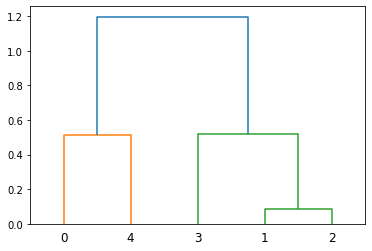

In [105]:
dendro=hierarchy.dendrogram(z)

In [111]:
algo=AgglomerativeClustering(n_clusters=5, linkage='complete'  )

In [112]:
algo.fit(dis)


AgglomerativeClustering(linkage='complete', n_clusters=5)

In [113]:
algo.labels_

array([3, 4, 1, 2, 0])